# **Lab 3: Multi-Class Classification**

In this third lab we are going to learn how to build an SVM model and a decision tree model for solving a Multi-Class classification problem



## Exercise 1: Multi-class Classification with SVM

In this exercise, you will train a multi-class classifier using Support Vector Machine.

We are going to use a dataset from the UCI Machine Learning Repository which contains a dataset about car evaluation (https://archive.ics.uci.edu/ml/datasets/Car+Evaluation). This dataset contains the state of second hand cars and their categories: "**evaluation**" column.

You will have to import the dataset from Python.

The steps are:
1.   Load and explore dataset
2.   Data preparation
3.   Split data
4.   Assess baseline model
5.   Train SVC with default Hyperparameter
6.   Reduce SVC Overfitting with C Hyperparameter

## 1. Load and Explore Dataset

**[1.1]** Install specific version of the packages to be used

In [ ]:
#!pip install numpy==1.18.5
#!pip install pandas==1.0.5
#!pip install scikit-learn=="0.22.2.post1"
#!pip install matplotlib==3.2.2
#!pip install altair==4.1.0

!pip uninstall scikit-learn -y

!pip install -U scikit-learn

**pip install ucimlrepo** #install library to add DS o your notebook

In [2]:
pip install ucimlrepo

**[1.2]** Task: Import the pandas package

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Import the pandas package

In [1]:
# Solution
import pandas as pd

**[1.3]** Task: Create a variable called file_url containing the link to the CSV file and load the dataset into dataframe called df

In [ ]:
# Placeholder for student's code (2 lines of code)
# Task: Import DS from Python

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X = car_evaluation.data.features
y = car_evaluation.data.targets

# metadata
print(car_evaluation.metadata)

# variable information
print(car_evaluation.variables)

{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'ID': 249, 'type': 'NATIVE', 'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'venue': '8th Intl Workshop on Expert Systems and their Applications, 

**[1.4]** Task: Display the first 5 rows of df

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Display the first 5 rows of df

In [3]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [4]:
y.head()

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc


**[1.5]** Task: Display the dimensions (shape) of df

In [5]:
# Solution
X.shape,y.shape

((1728, 6), (1728, 1))

In [6]:
# Solution
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
dtypes: object(6)
memory usage: 81.1+ KB


In [7]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   1728 non-null   object
dtypes: object(1)
memory usage: 13.6+ KB


**[1.7]** Task: Display the descriptive statictics of df


In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Display the descriptive statictics of df

In [8]:
# Solution
X.describe()

,buying,maint,doors,persons,lug_boot,safety
count,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3
top,vhigh,vhigh,2,2,small,low
freq,432,432,432,576,576,576


In [9]:
y.describe()

,class
count,1728
unique,4
top,unacc
freq,1210


**[1.8]** Task: Create a for loop that will iterate through each columns and print their list of unique values

In [ ]:
# Placeholder for student's code (3 lines of code)
# Task: Create a for loop that will iterate through each columns and print their name and list of unique values

In [10]:
# Solution:
for col in X.columns:
  print(col)
  print(X[col].unique())

buying
['vhigh' 'high' 'med' 'low']
maint
['vhigh' 'high' 'med' 'low']
doors
['2' '3' '4' '5more']
persons
['2' '4' 'more']
lug_boot
['small' 'med' 'big']
safety
['low' 'med' 'high']


In [11]:
# Solution:
for col in y.columns:
  print(col)
  print(y[col].unique())

class
['unacc' 'acc' 'vgood' 'good']


All the columns have discrete values so they are categorical.

## 2. Data Preparation

As seen in the lecture, machine learning models are not able to process categorical data if they are not transformed into numerical data.

There are 3 main ways to handle categorical features:
1.   Indexing
2.   Indexing with Mapping
3.   One-Hot Encoding

With our current dataset, the best choice will be to use the indexing with mapping method as each of the faeture are ranked (there is some order between values).

**[2.1]** Task: Create a copy of df and save it into a variable called df_cleaned

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Create a copy of df and save it into a variable called df_cleaned

In [12]:
# Solution
df_cleaned = X.copy()

**[2.2]** Task: Import OrdinalEncoder from sklearn.preprocessing

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Import OrdinalEncoder from sklearn.preprocessing

In [13]:
# Solution
from sklearn.preprocessing import OrdinalEncoder

**[2.3]** Task: Create a list called 'buying_price_categories' containing the list of values ordered from the smallest to the highest

Note: It has to be a list of list

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Create a list called 'buying_price_cats' containing the list of values ordered from the smallest to the highest

In [14]:
# Solution
buying_price_cats = [['low', 'med', 'high', 'vhigh']]

**[2.4]** Task: Instantiate the OrdinalEncoder class with 'buying_price_cats' as categories and save it into a variable called buying_price_enc

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Instantiate the OrdinalEncoder class with 'buying_price_cats' as categories and save it into a variable called buying_price_enc

In [15]:
# Solution
buying_price_enc = OrdinalEncoder(categories=buying_price_cats)

**[2.5]** Now we can use our trained encoder to transform this column

In [16]:
df_cleaned['buying_price_encoded'] = buying_price_enc.fit_transform(df_cleaned[['buying']])

**[2.6]** Task: Display the columns 'buying_price','buying_price_encoded'

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Display the columns 'buying_price','buying_price_encoded'

In [17]:
# Solution
df_cleaned[['buying','buying_price_encoded']]

,buying,buying_price_encoded
0,vhigh,3.0
1,vhigh,3.0
2,vhigh,3.0
3,vhigh,3.0
4,vhigh,3.0
...,...,...
1723,low,0.0
1724,low,0.0
1725,low,0.0
1726,low,0.0


**[2.7]** Let's replace the values of 'buying_price' with its encoded version and remove the 'buying_price_encoded' column

In [18]:
df_cleaned['buying'] = df_cleaned['buying_price_encoded']
df_cleaned.drop('buying_price_encoded', axis=1, inplace=True)

**[2.8]** Task: Repeat the same process to convert 'maintenance_cost' into index mapping

In [ ]:
# Placeholder for student's code (3 lines of code)
# Task: Repeat the same process to convert 'maintenance_cost' into index mapping

In [19]:
# Solution
maintenance_cost_cats = [['low', 'med', 'high', 'vhigh']]
maintenance_cost_enc = OrdinalEncoder(categories=maintenance_cost_cats)
df_cleaned['maint'] = maintenance_cost_enc.fit_transform(df_cleaned[['maint']])

**[2.9]** Let's create a dictionay for the remaining categorical variables containing their list of values

In [20]:
cats_dict = {
    'doors': [['2', '3', '4', '5more']],
    'persons': [['2', '4', 'more']],
    'lug_boot': [['small', 'med', 'big']],
    'safety': [['low', 'med', 'high']]
}

**[2.10]** Task: Create a for loop that iterates 'cats_dict' and transform each column into ordinal type

In [ ]:
# Placeholder for student's code (3 lines of code)
# Task: Create a for loop that iterates 'cats_dict' and transform each column into ordinal type

In [21]:
# Solution
for col, cats in cats_dict.items():
  col_encoder = OrdinalEncoder(categories=cats)
  df_cleaned[col] = col_encoder.fit_transform(df_cleaned[[col]])

**[2.11]** Task: Print the first 5 rows of df_cleaned

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Print the first 5 rows of df_cleaned

In [22]:
# Solution
df_cleaned.head()

,buying,maint,doors,persons,lug_boot,safety
0,3.0,3.0,0.0,0.0,0.0,0.0
1,3.0,3.0,0.0,0.0,0.0,1.0
2,3.0,3.0,0.0,0.0,0.0,2.0
3,3.0,3.0,0.0,0.0,1.0,0.0
4,3.0,3.0,0.0,0.0,1.0,1.0


**[2.12]** Task : Split the target (X) and the features (Y) into test and train

In [ ]:
# Placeholder for student's code (1 line of code)
# Task : Split the target (X) and the features (Y)

In [23]:
# Solution:

X = df_cleaned


## 3. Split data

Until now, we only train and assess the performance of a model on the same set of data. But if you are planning to put your model into production, you will not only need to achieve high performance on trained data but also on unsees ones.

**[3.1]** Task: Print the number of occurence for each value of the target
variable

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Print the number of occurence for each value of the target variable

In [24]:
# Solution:
y.value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

**[3.2]** Task: Print the frequencies of each value of the target variable

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Print the frequencies of each value of the target variable

In [25]:
# Solution:
y.value_counts(normalize=True)

class
unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: proportion, dtype: float64

**[3.3]** Task: Import train_test_split from sklearn.model_selection

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Import train_test_split from sklearn.model_selection

In [26]:
# Solution:
from sklearn.model_selection import train_test_split

**[3.4]** We will first start by splitting the dataset into 2 different sets: data and test

In [27]:
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

We split the data randomly into 2 groups and the testing set contains 20% of the original data

**[3.5]** Task: Print the number of rows of the testing target

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Print the number of rows of the testing target

In [28]:
# Solution:
y_test.shape

(346, 1)

**[3.6]** Task: Print the frequencies of each value of the testing target

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Print the frequencies of each value of the testing target

In [29]:
# Solution:
y_test.value_counts(normalize=True)

class
unacc    0.710983
acc      0.196532
vgood    0.052023
good     0.040462
Name: proportion, dtype: float64

The frequencies follow the same distribution of the original dataset. Now we will create a training and a validation sets from the remaining data

**[3.7]** Task: Split the data randomly into 2 different sets: training (80%) and validation (20%)

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Split the data randomly into 2 different sets: training (80%) and validation (20%)

In [30]:
# Solution:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=8)

**[3.8]** Task: Print the number of rows of the training and validation sets

In [ ]:
# Placeholder for student's code (2 lines of code)
# Task: Print the number of rows of the training and validation sets

In [31]:
# Solution:
print(X_train.shape)
print(X_val.shape)

(1105, 6)
(277, 6)


**[3.9]** Task: Print the frequencies of each value of the validation target

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Print the frequencies of each value of the validation target

In [32]:
# Solution:
y_val.value_counts(normalize=True)

class
unacc    0.685921
acc      0.249097
good     0.043321
vgood    0.021661
Name: proportion, dtype: float64

**[3.10]** Task: Print the frequencies of each value of the training target

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Print the frequencies of each value of the training target

In [33]:
# Solution:
y_train.value_counts(normalize=True)

class
unacc    0.700452
acc      0.223529
good     0.038914
vgood    0.037104
Name: proportion, dtype: float64

## 4. Assess Baseline Model

**[4.1]** Task: Find the mode of the target variable from the training set and print its value

In [ ]:
# Placeholder for student's code (2 lines of code)
# Task: Find the mode of the target variable and print its value

In [34]:
# Solution
y_mode = y_train.mode()#most occuring value
y_mode

,class
0,unacc


**[4.2]** Task: Import numpy and create a numpy array with the same dimensions as for the training set called y_base filled with this value



In [ ]:
# Placeholder for student's code (3 lines of code)
# Task: Import numpy and create a numpy array called y_base filled with this value

In [35]:
# Solution
import numpy as np

y_shape = (len(X_train), 1)
y_base = np.full(y_shape, y_mode)

**[4.3]** Task: Import the accuracy score from sklearn

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Import the accuracy score from sklearn

In [36]:
# Solution
from sklearn.metrics import accuracy_score

**[4.4]** Task: Display the accuracy score of this baseline model on the training set

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Display the accuracy score of this baseline model on the training set

In [37]:
# Solution
accuracy_score(y_train, y_base)

0.7004524886877828

### 5. Train SVC with default Hyperparameter
A multiclass classification problem is the same as a binary classification except that our target y has more than 2 possible labels.

Let us build a multiclass classifier using a Support Vector Machine model. Our target "**evaluation**" contains 4 possibles classes.

**[5.1]** Task: Import SVC from sklearn.svm

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Import SVC from sklearn.svm

In [38]:
# Solution
from sklearn.svm import SVC

**[5.2]** Task: Instantiate a SVC() model with default hyperparameters

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Instantiate a SVC() model with default hyperparameters

In [39]:
# Solution
svc_1 = SVC()

**[5.3]** Task: Train the model on the training set

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Train the model on the training set

In [40]:
# Solution
svc_1.fit(X_train, y_train)

/Users/bonheur/Documents/50 - WORK/70 - MYKB/00 - Trainings/Data Science ML/UTS/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

**[5.4]** Task: Print the accuracy score of the training set

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Print the accuracy score of the training set

In [41]:
# Solution
svc_1.score(X_train, y_train)

0.9782805429864253

This initial model is already achieving remarkable results. It got an accuracy score of 0.98

**[5.5]** Task: Import plot_confusion_matrix from sklearn.metrics and matplotlib

In [ ]:
# Placeholder for student's code (2 lines of code)
# Task: Import plot_confusion_matrix from sklearn.metrics and matplotlib

In [42]:
# Solution
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

**[5.6]** Let's have a deeper look at how our model is performing by looking at the confusion matrix on the training set

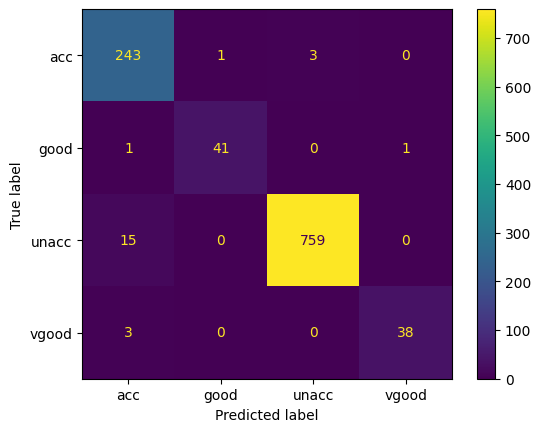

In [43]:
ConfusionMatrixDisplay.from_estimator(  svc_1, X_train, y_train)

This confusion matrix is telling us this model has a bit of difficulty of differentiating some cases between 'unacc' and 'acc'. There are 20 cases where it predicted 'acc' while the true value was 'unacc'.

**[5.7]** Task: Print the accuracy score of the validation set

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Print the accuracy score of the validation set

In [44]:
# Solution:
svc_1.score(X_val, y_val)

0.9314079422382672

Even though our model is achieving a high accuracy score of 0.93, it is lower than for the training set. This tells us the model is overfitting.


**[5.8]** Task: Print the confusion matrix on the validation set

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Print the confusion matrix on the validation set

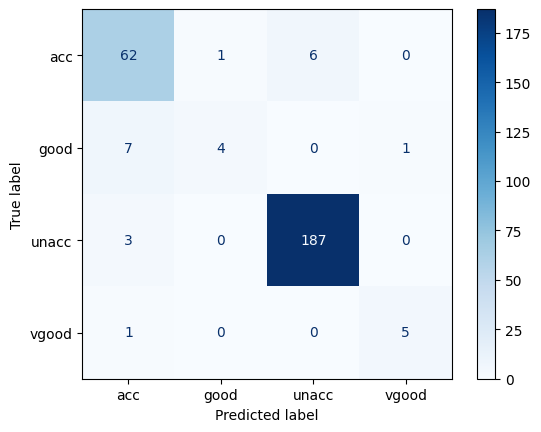

In [45]:
# Solution:
ConfusionMatrixDisplay.from_estimator(  svc_1,X_val, y_val,cmap=plt.cm.Blues)

**[5.9]** Let's try to add some weights for each class

In [46]:
svc_2 = SVC(class_weight='balanced').fit(X_train, y_train)
print(svc_2.score(X_train, y_train))
print(svc_2.score(X_val, y_val))

/Users/bonheur/Documents/50 - WORK/70 - MYKB/00 - Trainings/Data Science ML/UTS/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9529411764705882
0.9386281588447654


The scores are now closer to each other

**[5.10]** Let's look at the confusion matrices

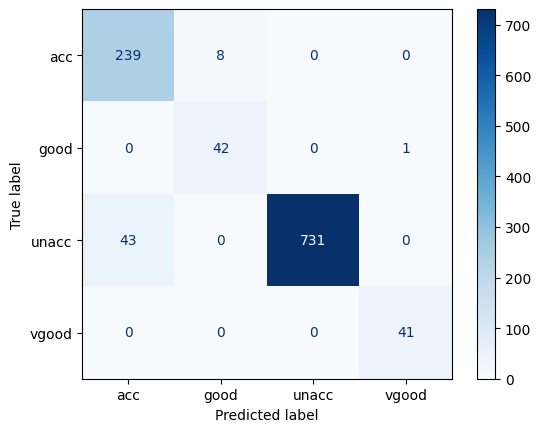

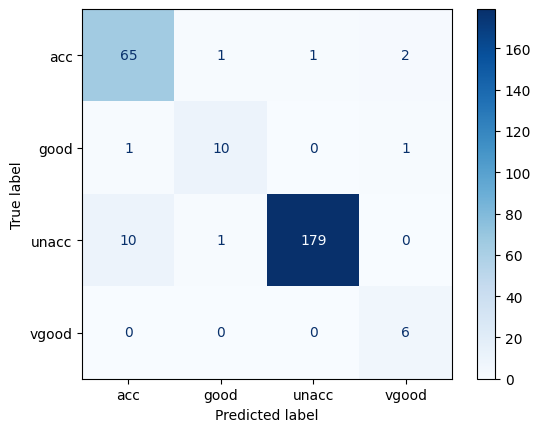

In [47]:
ConfusionMatrixDisplay.from_estimator(svc_2, X_train, y_train, cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_estimator(svc_2, X_val, y_val, cmap=plt.cm.Blues)

The confusion matrices show more similar patterns. Let's see if we can reduce the overfitting even further.

## 6. Reduce SVC Overfitting with C Hyperparameter

**[6.1]** Task: Train a SVC model with C=0.5 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code (3 lines of code)
# Task: Train a SVC model with C=0.5 and print the accuracy score for the training and validation sets

In [48]:
# Solution
svc_c_1 = SVC(class_weight='balanced', C=0.5).fit(X_train, y_train)
print(svc_c_1.score(X_train, y_train))
print(svc_c_1.score(X_val, y_val))

/Users/bonheur/Documents/50 - WORK/70 - MYKB/00 - Trainings/Data Science ML/UTS/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9321266968325792
0.9205776173285198


The accuracy scores decreased for the training and validation sets but they are closer to each other.

**[6.2]** Task: Train a SVC model with C=1 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code (3 lines of code)
# Task: Train a SVC model with C=1 and print the accuracy score for the training and validation sets

In [49]:
# Solution
svc_c_2 = SVC(class_weight='balanced', C=1).fit(X_train, y_train)
print(svc_c_2.score(X_train, y_train))
print(svc_c_2.score(X_val, y_val))

/Users/bonheur/Documents/50 - WORK/70 - MYKB/00 - Trainings/Data Science ML/UTS/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9529411764705882
0.9386281588447654


**[6.3]** Task: Train a SVC model with C=0.9 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code (3 lines of code)
# Task: Train a SVC model with C=0.9 and print the accuracy score for the training and validation sets

In [50]:
# Solution
svc_c_3 = SVC(class_weight='balanced', C=0.9).fit(X_train, y_train)
print(svc_c_3.score(X_train, y_train))
print(svc_c_3.score(X_val, y_val))

/Users/bonheur/Documents/50 - WORK/70 - MYKB/00 - Trainings/Data Science ML/UTS/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9466063348416289
0.9422382671480144


With C=0.9, we got reasonably close accuracy score for the training and validation sets. The model is not overfitting much.

**[6.4]** Task: Plot the confusion matrics for the training and validation sets

In [ ]:
# Placeholder for student's code (3 lines of code)
# Task: Plot the confusion matrics for the training and validation sets

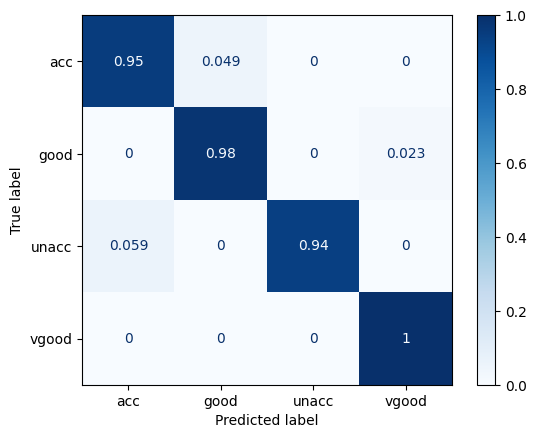

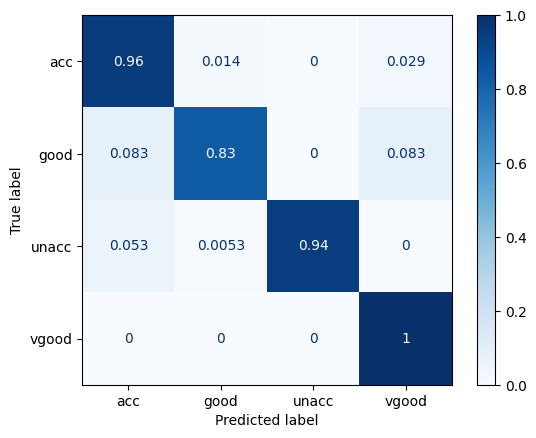

In [51]:
# Solution
ConfusionMatrixDisplay.from_estimator(svc_c_3, X_train, y_train, cmap=plt.cm.Blues, normalize='true')
ConfusionMatrixDisplay.from_estimator(svc_c_3, X_val, y_val, cmap=plt.cm.Blues, normalize='true')

This is our best model so far with the following hyperparameters: C=0.9. It achieved good performance and it is not overfitting much. Let's confirm this on the testing set.

**[6.5]** Task: Print the accuracy score on the testing set

In [ ]:
# Placeholder for student's code (3 lines of code)
# Task: Print the accuracy score on the testing set

In [52]:
# Solution:
svc_c_3.score(X_test, y_test)

0.9421965317919075

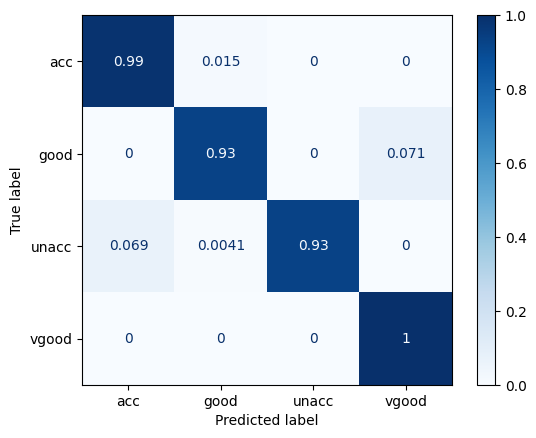

In [53]:
ConfusionMatrixDisplay.from_estimator(svc_c_3, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

The accuracy score for the testing set is very close to the ones achieved on the training and testing sets. We are quite confident our model will be able to predict accurately on unseen data.